# Predictive maintenance of industrial machinery

_by Virginia Herrero_

## Introduction

Predictive maintenance focuses on anticipating equipment failures before they happen. This approach uses data and advanced technology to detect potential problems at an early stage, rather than waiting for a breakdown to occur. Companies can detect problems before they even happen by analyzing and evaluating sensor data using machine learning. 

Predictive maintenance is important for companies because it helps them avoid unplanned downtime, which can be very expensive. It can also reduce repair costs and extend the service life of industrial machines. Switching from a reactive to a proactive maintenance plan, companies can increase their productivity, keep their operations smooth and improve their profit. 

The goal of this project is to develop a predictive machine learning model capable of predicting failures in an industrial milling machine. The model will identify patterns and indicators of potential failures by analyzing historical data from the milling machine. This predictive capability seeks to improve operational efficiency, reduce repair costs and extend equipment life to ultimately ensure smoother production processes and higher overall productivity.

## Project Overview

- Data loading
- Data cleaning
- Data exploration
- Data pre-processing
- Data splitting and sampling
- Modeling and evaluation
- Conclusion

## Dataset overview

The dataset used in this project is a synthetic dataset modeled after a milling machine, comprising 10,000 data points organized in rows with 14 distinct features in columns.

**Features**

* `UID`: unique identifier ranging from 1 to 10,000.

* `Product ID`: a combination of a letter (L, M, H) indicating quality (low, medium, high) with respective proportions of 50%, 30%, and 20%, followed by a variant-specific serial number.

* `Type`: product quality represented as a letter (L for low, M for medium, H for high).

* `Air temperature [K]`: generated using a random walk process, normalized to a standard deviation of 2 K around a mean of 300 K.

* `Process temperature [K]`: derived from a random walk process, normalized to a standard deviation of 1 K, and adjusted to the air temperature plus an additional 10 K.

* `Rotational speed [rpm]`: calculated based on a power output of 2860 W, with added normally distributed noise.

* `Torque [Nm]`: normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring all values are non-negative.

* `Tool wear [min]`: varies by quality variant, with additional wear times of 5, 3, and 2 minutes for high, medium, and low variants, respectively.

* `Machine failure`: a binary label indicating whether a machine failure occurred at this data point. It is set to 1 if at least one of the following independent failure modes is triggered:

    * `Tool Wear Failure (TWF)`: triggered when tool wear reaches a randomly selected time between 200 and 240 minutes.

    * `Heat Dissipation Failure (HDF)`: occurs if the temperature difference between air and process is below 8.6 K and rotational speed is below 1380 rpm.

    * `Power Failure (PWF)`: triggered when the power, calculated as the product of torque and rotational speed (in rad/s), falls below 3500 W or exceeds 9000 W.

    * `Overstrain Failure (OSF)`: occurs if the product of tool wear and torque exceeds thresholds (11,000 minNm for L, 12,000 for M, 13,000 for H).

    * `Random Failures (RNF)`: each process has a 0.1% probability of failing, independent of other parameters.

**Publication Reference**

This dataset is part of the following publication:

_S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), pp. 69-74._

## Data loading
Load the CSV file **predictive-maintenance-dataset-ai4i2020** as a pandas DataFrame.

In [2]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("predictive-maintenance-dataset-ai4i2020.csv")
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

## Data cleaning
Clean and pre-process the dataset prior to conducting further analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

* **Remove unncessary columns**

The columns UDI and Product ID are indexes and lack predictive value; therefore, they are removed from the dataset.

In [5]:
df = df.drop(["UDI", "Product ID"], axis = 1)

* **Rename columns**

Some column names are renamed to enhance readability and improve comprehension of the dataset.

In [6]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [7]:
df = df.rename(columns = {"Type" : "Product_quality",
                          "Air temperature [K]" : "Air_temperature_K",
                          "Process temperature [K]" : "Process_temperature_K",
                          "Rotational speed [rpm]" : "Rotational_speed_rpm",
                          "Torque [Nm]" : "Torque_Nm",
                          "Tool wear [min]" : "Tool_wear_min",
                          "Machine failure" : "Machine_failure"})

In [8]:
df.head()

Product_quality  Air_temperature_K  Process_temperature_K  \
0               M              298.1                  308.6   
1               L              298.2                  308.7   
2               L              298.1                  308.5   
3               L              298.2                  308.6   
4               L              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Machine_failure  TWF  HDF  \
0                  1551       42.8              0                0    0    0   
1                  1408       46.3              3                0    0    0   
2                  1498       49.4              5                0    0    0   
3                  1433       39.5              7                0    0    0   
4                  1408       40.0              9                0    0    0   

   PWF  OSF  RNF  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

* **Data types**

Check that all columns have the appropriate data types.

In [9]:
df.dtypes

Product_quality           object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

Set numerical features **Rotational_speed_rpm** and **Tool_wear_min** to float type.

In [10]:
df["Rotational_speed_rpm"] = df["Rotational_speed_rpm"].astype("float64")
df["Tool_wear_min"] = df["Tool_wear_min"].astype("float64")

* **Null values**

Identify and remove any missing values from the dataset as needed.

In [11]:
# Check the total of null values in each column
df.isna().sum()

Product_quality          0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

The dataset has no missing values.

* **Duplicated values**

Check for duplicate entries in the dataset.

In [12]:
df.duplicated().sum()

np.int64(0)

The dataset has no duplicate values.

* **Outliers**

Examine the statistical summary of the dataset to identify potential outliers. This initial overview will help highlight any unusual values that may require further investigation.

In [13]:
df.describe()

Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
count       10000.000000           10000.000000          10000.000000   
mean          300.004930             310.005560           1538.776100   
std             2.000259               1.483734            179.284096   
min           295.300000             305.700000           1168.000000   
25%           298.300000             308.800000           1423.000000   
50%           300.100000             310.100000           1503.000000   
75%           301.500000             311.100000           1612.000000   
max           304.500000             313.800000           2886.000000   

          Torque_Nm  Tool_wear_min  Machine_failure           TWF  \
count  10000.000000   10000.000000     10000.000000  10000.000000   
mean      39.986910     107.951000         0.033900      0.004600   
std        9.968934      63.654147         0.180981      0.067671   
min        3.800000       0.000000         0.000000      0.000000   
25%       33.200000      53.000000         0.000000      0.000000   
50%       40.100000     108.000000         0.000000      0.000000   
75%       46.800000     162.000000         0.000000      0.000000   
max       76.600000     253.000000         1.000000      1.000000   

                HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.011500      0.009500      0.009800      0.00190  
std        0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.00000

The torque and rotational speed statistics suggest the presence of outliers. However, as mentioned in the dataset overview, extreme values in these features are linked to machinery failure. Therefore, I have decided not to address these outliers to improve prediction accuracy. Nevertheless, the distributions of these two features will be plotted to visualize the extreme values.

Text(0.5, 0.98, 'Rotational Speed Distribution')

<Figure size 640x480 with 0 Axes>

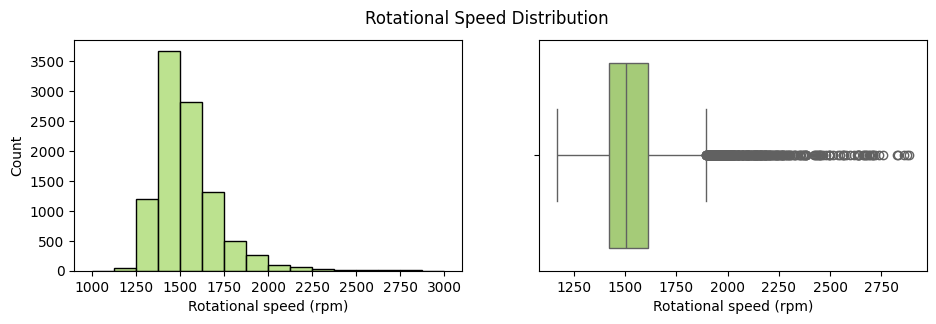

In [14]:
# Plot the rotational speed distribution using a histogram and boxplot
rotational_speed_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Rotational_speed_rpm"], ax = ax[0], bins = 16, binrange = (1000, 3000), color = "#a6d96a")
sns.boxplot(x = df["Rotational_speed_rpm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Rotational speed (rpm)")
ax[1].set_xlabel("Rotational speed (rpm)")
plt.suptitle("Rotational Speed Distribution", size = 12)

Text(0.5, 0.98, 'Torque Distribution')

<Figure size 640x480 with 0 Axes>

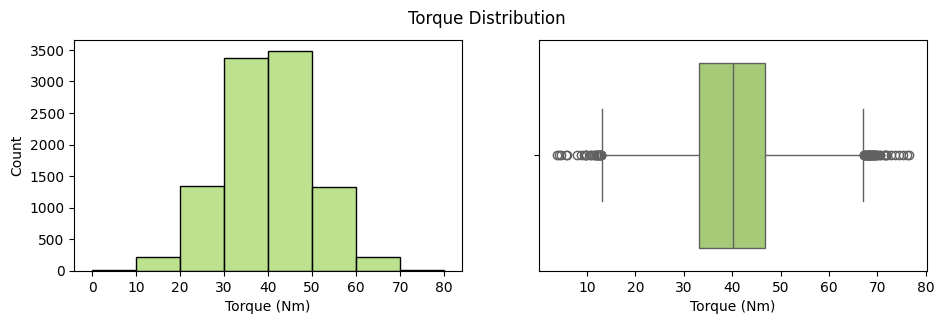

In [15]:
# Plot torque distribution using a histogram and boxplot
torque_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Torque_Nm"], ax = ax[0], bins = 8, binrange = (0, 80), color = "#a6d96a")
sns.boxplot(x = df["Torque_Nm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Torque (Nm)")
ax[1].set_xlabel("Torque (Nm)")
plt.suptitle("Torque Distribution", size = 12)

* **The clean dataset:**

In [16]:
predictive_maintenance = df.copy()
predictive_maintenance.head()

Product_quality  Air_temperature_K  Process_temperature_K  \
0               M              298.1                  308.6   
1               L              298.2                  308.7   
2               L              298.1                  308.5   
3               L              298.2                  308.6   
4               L              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Machine_failure  TWF  HDF  \
0                1551.0       42.8            0.0                0    0    0   
1                1408.0       46.3            3.0                0    0    0   
2                1498.0       49.4            5.0                0    0    0   
3                1433.0       39.5            7.0                0    0    0   
4                1408.0       40.0            9.0                0    0    0   

   PWF  OSF  RNF  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

## Data exploration

In this section, an in-depth data exploratory analysis is carried out.

#### **Univariate exploration**

- **Features distribution**

The first step is to examine each feature in the dataset to obtain a general overview of their distributions. The histograms reveal that the data is imbalanced, particularly in the following features: **Product_quality, Machine _failure, TWF, HDF, PWF, OSF, and RNF**.

Imbalanced data occurs when one category in a dataset significantly outnumbers another, such as 90% in category A and 10% in category B. This can lead to biased models that favor the majority category, making it difficult to predict outcomes for the minority category. Techniques like resampling, adjusting category weights, or using specialized algorithms can help address this issue.

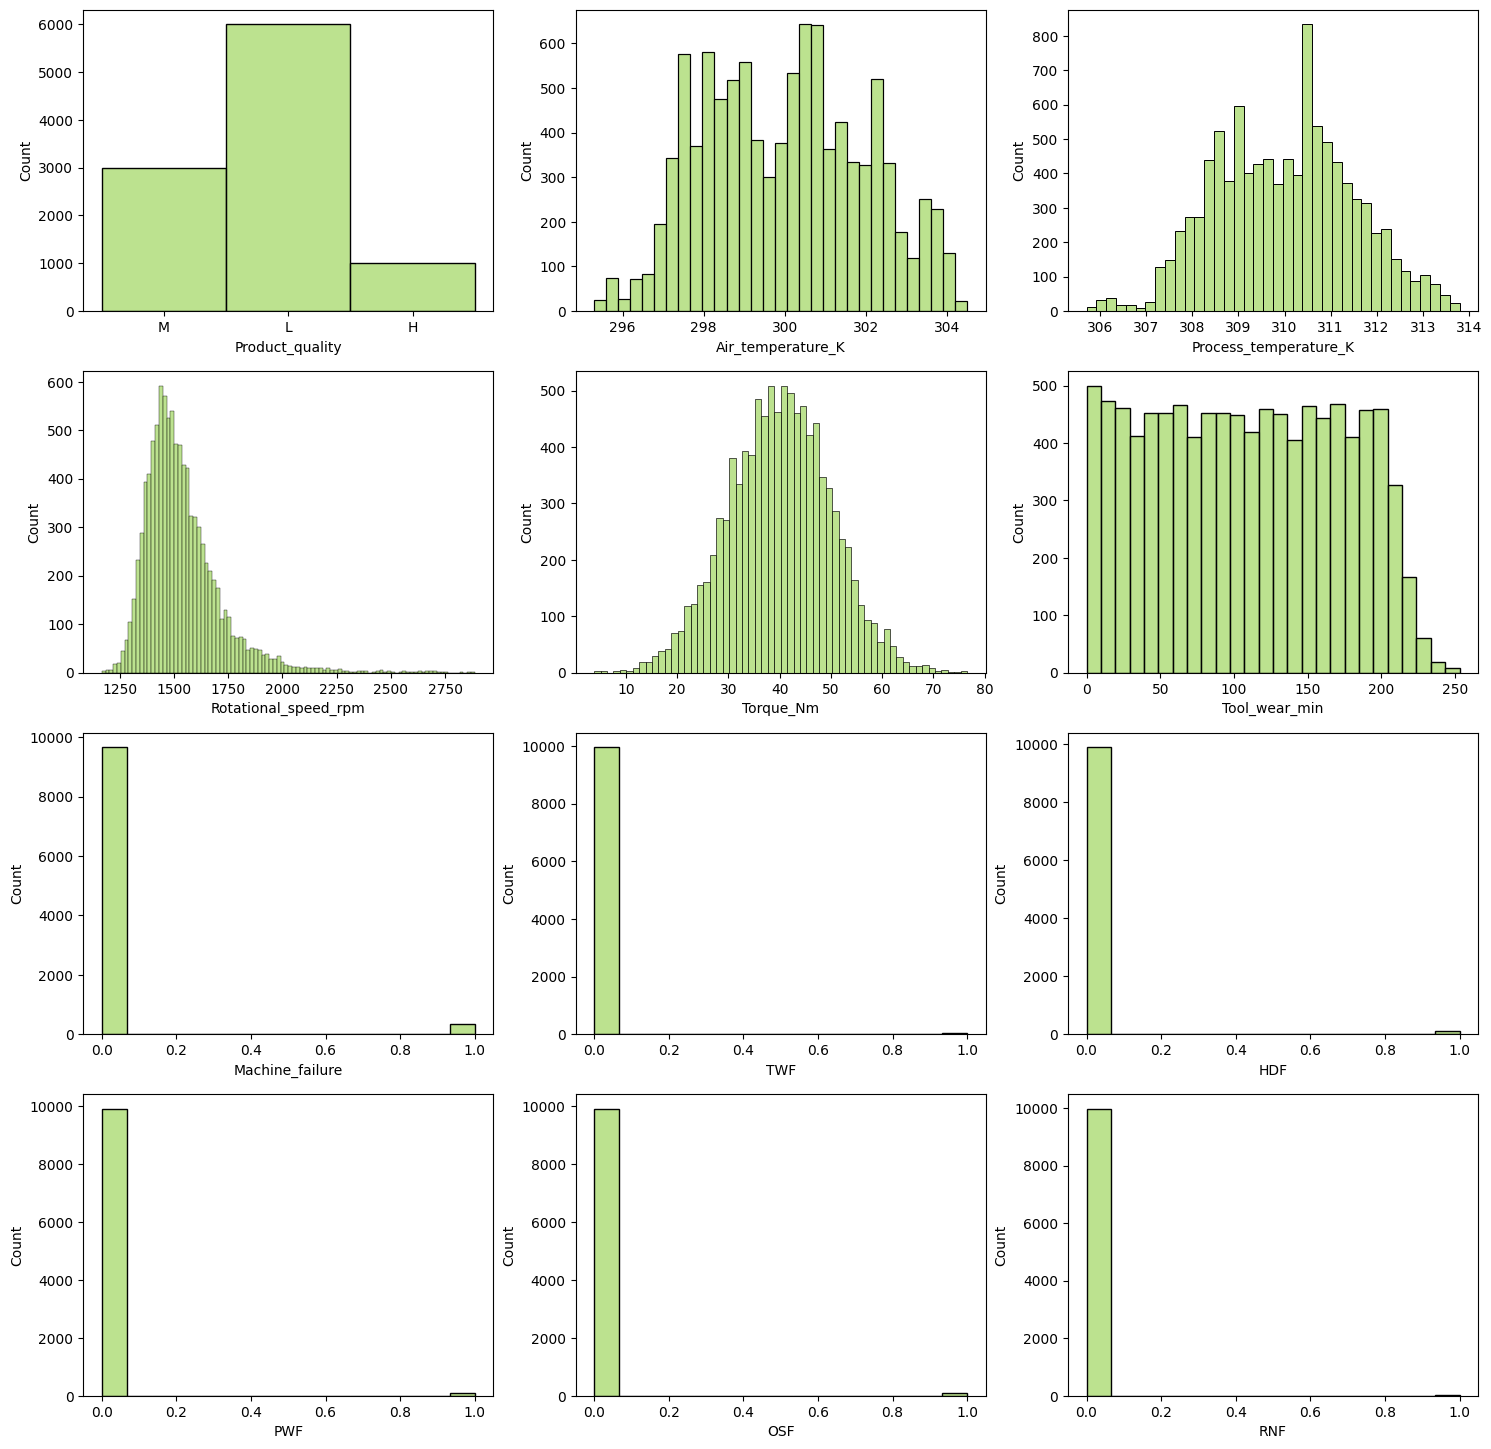

In [17]:
# Plot distribution of all feature on the datasest
fig, ax = plt.subplots(4, 3, figsize = (18, 18))
for i, col in enumerate(predictive_maintenance.columns):
    sns.histplot(predictive_maintenance[col], ax = ax[i//3][i%3], color = "#a6d96a")

- **Product quality**

Let's examine the distribution of the product quality feature.

There are three different quality categories: low, medium, and high. The distribution is notably unbalanced, with the "low" quality category having significantly more observations compared to the other two categories.

In [18]:
product_quality_dist = predictive_maintenance["Product_quality"].value_counts()
product_quality_dist

Product_quality
L    6000
M    2997
H    1003
Name: count, dtype: int64

Text(0.5, 1.0, 'Product Quality Distribution')

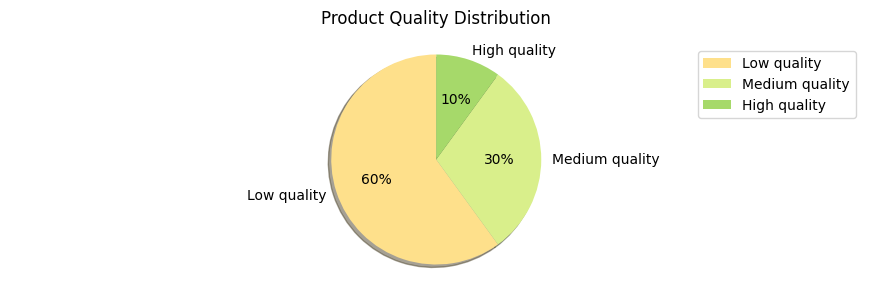

In [19]:
labels = ["Low quality", "Medium quality", "High quality"]
colors = ["#fee08b", "#d9ef8b", "#a6d96a"]

product_quality_dist_graph = plt.figure(figsize = (11, 3))
plt.pie(product_quality_dist, labels = labels, colors = colors, startangle = 90, autopct="%1.0f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title("Product Quality Distribution", pad = 15)

- **Machine failure**

This column serves as the target variable for the project, which aims to predict machine failure. It is a binary column containing values of 1 and 0. The histogram above indicates an imbalanced dataset; however, a more detailed analysis will be conducted to explore this further.

In [20]:
machine_failure_dist = predictive_maintenance["Machine_failure"].value_counts()
machine_failure_dist

Machine_failure
0    9661
1     339
Name: count, dtype: int64

Text(0.5, 1.0, 'Machine Failure Distribution')

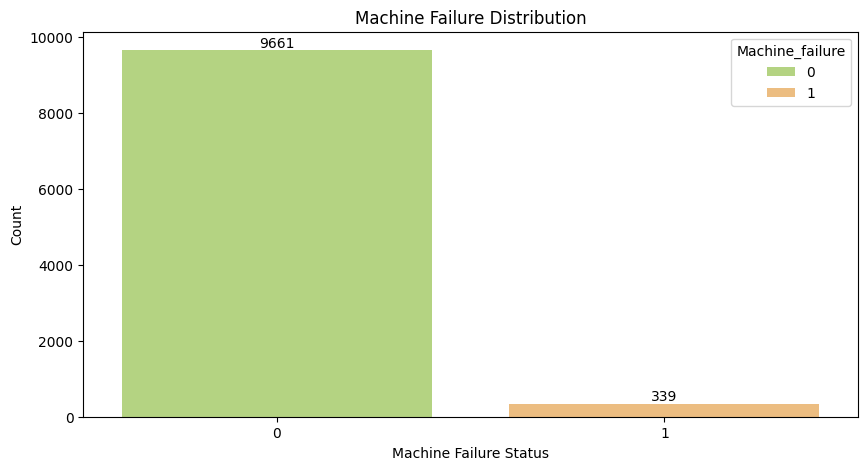

In [21]:
machine_failure_dist_graph = plt.figure(figsize = (10, 5))
ax = sns.countplot(predictive_maintenance, x = "Machine_failure", hue = "Machine_failure", palette = "RdYlGn_r")
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Machine Failure Status")
plt.ylabel("Count")
plt.title("Machine Failure Distribution", size = 12)

Text(0.5, 1.0, 'Machine Failure Distribution')

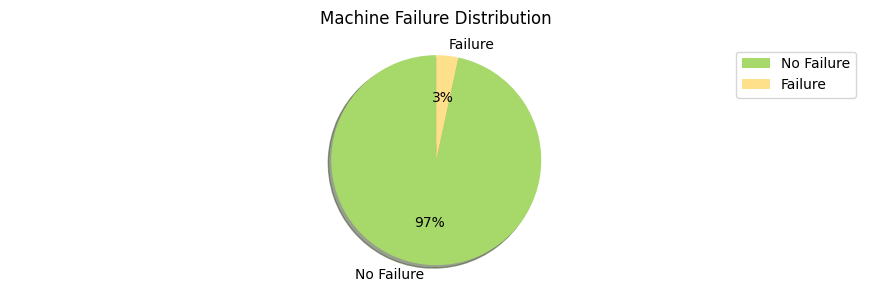

In [22]:
labels = ["No Failure", "Failure"]
colors = [ "#a6d96a", "#fee08b"]

machine_failure_percentage_graph = plt.figure(figsize = (11, 3))
plt.pie(machine_failure_dist, labels = labels, colors = colors, startangle = 90, autopct="%1.0f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title("Machine Failure Distribution", pad = 15)

- **Machine failure percentage by product quality**

The low-quality product has a higher machine failure rate of 4%, while the medium-quality product has a failure rate of 3%. In contrast, the high-quality product demonstrates the lowest failure rate at 2%.

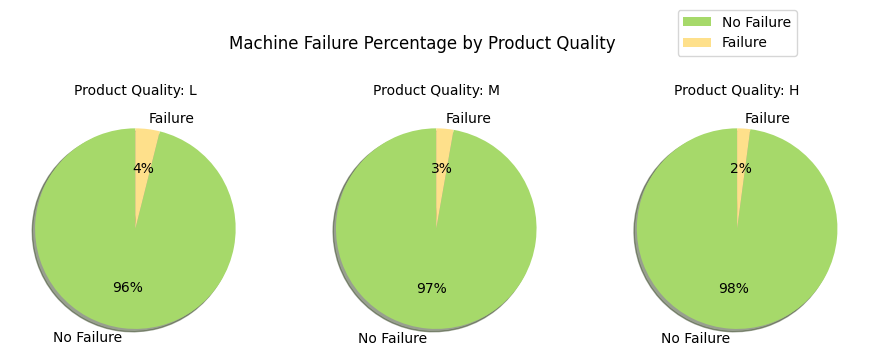

In [23]:
labels = ["No Failure", "Failure"]
colors = ["#a6d96a", "#fee08b"]

fig, ax = plt.subplots(1, 3, figsize=(11, 4))

ax = ax.flatten()

for j, quality in enumerate(["L", "M", "H"]):
    df_product_type = predictive_maintenance[predictive_maintenance["Product_quality"] == quality]
    ax[j].pie(df_product_type["Machine_failure"].value_counts(), labels = labels, colors = colors, startangle = 90, autopct = "%1.0f%%", shadow = True)
    ax[j].set_title(f"Product Quality: {quality}", size = 10)

plt.suptitle("Machine Failure Percentage by Product Quality", size = 12)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.4))

- **Type of failure**

There are five different types of failures: TWF, HDF, PWF, OSF, RNF.

The machine failure distribution bar plot illustrates that the most frequent machine failure is HDF, followed by OSF. In contrast, RNF has the fewest observations, which is expected, as it represents a random failure occurring at a rate of just 0.1%, regardless of the parameters.

In [24]:
# Create a dataframe containing only the different types of machine failure
machine_failure_types = predictive_maintenance.loc[:, ["TWF", "HDF", "PWF", "OSF", "RNF"]]

In [25]:
# Sum the number of times a failure was registered in the dataset
sum_failures = machine_failure_types.sum().sort_values(ascending=True)
sum_failures

RNF     19
TWF     46
PWF     95
OSF     98
HDF    115
dtype: int64

Text(0.5, 1.0, 'Machine Failure Type Distribution')

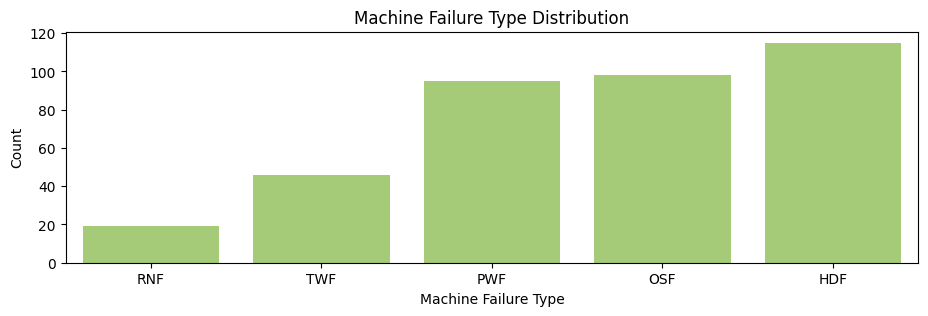

In [26]:
failure_types_distribution_graph = plt.figure(figsize = (11, 3))
sns.barplot(sum_failures, color = "#a6d96a")
plt.xlabel("Machine Failure Type")
plt.ylabel("Count")
plt.title("Machine Failure Type Distribution", size = 12)

An additional step will be taken to investigate whether multiple failures occur simultaneously.

In [27]:
# Sum failure values per row
sum_rows = machine_failure_types.sum(axis = 1)

Text(0.5, 1.0, 'Distribution of Simultaneous Failures')

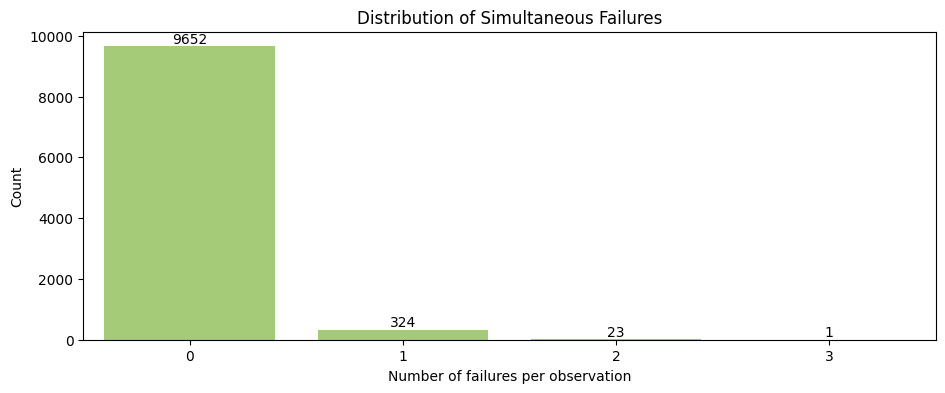

In [28]:
# Plot count of failure types happening simultaneously
count_simultaneous_failures = plt.figure(figsize = (11, 4))
ax = sns.countplot(x = sum_rows, color = "#a6d96a")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha = "center", va = "bottom")
plt.xlabel("Number of failures per observation")
plt.ylabel("Count")
plt.title("Distribution of Simultaneous Failures", size = 12)

Some observations experience multiple failures simultaneously, although the frequency is quite low. Specifically, there are 23 instances of two machine failures occurring at the same time, and one instance of three machine failures happening simultaneously

- **Type of machine failure per product quality**

In [29]:
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]

failure_per_quality = pd.DataFrame()

for type in failure_types: 
    sum = predictive_maintenance.groupby("Product_quality")[type].sum()
    failure_per_quality = pd.concat([failure_per_quality, sum], axis = 1)

array([[<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

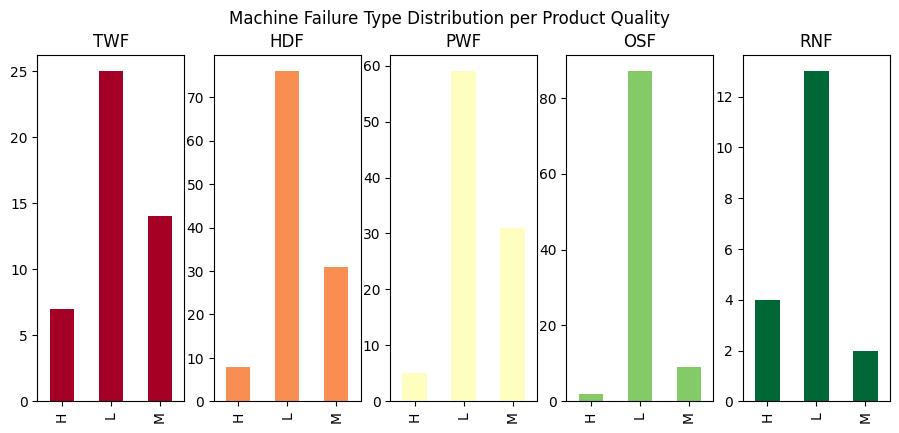

In [30]:
failure_per_quality.plot(figsize = (11, 4.5), subplots=True, layout= (1,5), legend = False,
                         kind = "bar", colormap = "RdYlGn", title = "Machine Failure Type Distribution per Product Quality")

It has already been established that low-quality products have a higher percentage of machine failures. Analyzing each failure type individually reveals a consistent pattern: products with lower quality experience more failures, while higher quality products have fewer failures. However, in the case of RNF failures, it was observed that the failure rate is higher for high-quality products compared to medium-quality ones.

- **Drop the RNF failures**

RNF represents a random failure occurring at a rate of just 0.1%, regardless of the parameters, it lacks predictive value therefore it is drop from the dataset.

In [31]:
predictive_maintenance = predictive_maintenance.drop("RNF", axis = 1)

**In Summary:**

- There are three types of product quality: low, medium, and high.
- Machine failures account for only 3% of the observations in the dataset.
- The incidence of machine failures is notably higher among lower-quality products.
- There are five types of machine failures: TWF, HDF, PWF, OSF, and RNF.
- The most frequent failures are HDF, OSF, and PWF.
- For all types of machine failures, lower-quality products exhibit a higher failure count, with the exception of RNF failures.

#### **Bivariate exploration**

**Correlation matrix**

A correlation matrix is used to find the correlation between features.

In [32]:
correlations = predictive_maintenance.corr(numeric_only = True)
correlations

Air_temperature_K  Process_temperature_K  \
Air_temperature_K               1.000000               0.876107   
Process_temperature_K           0.876107               1.000000   
Rotational_speed_rpm            0.022670               0.019277   
Torque_Nm                      -0.013778              -0.014061   
Tool_wear_min                   0.013853               0.013488   
Machine_failure                 0.082556               0.035946   
TWF                             0.009955               0.007315   
HDF                             0.137831               0.056933   
PWF                             0.003470              -0.003355   
OSF                             0.001988               0.004554   

                       Rotational_speed_rpm  Torque_Nm  Tool_wear_min  \
Air_temperature_K                  0.022670  -0.013778       0.013853   
Process_temperature_K              0.019277  -0.014061       0.013488   
Rotational_speed_rpm               1.000000  -0.875027       0.000223   
Torque_Nm                         -0.875027   1.000000      -0.003093   
Tool_wear_min                      0.000223  -0.003093       1.000000   
Machine_failure                   -0.044188   0.191321       0.105448   
TWF                                0.010389  -0.014662       0.115792   
HDF                               -0.121241   0.142610      -0.001287   
PWF                                0.123018   0.083781      -0.009334   
OSF                               -0.104575   0.183465       0.155894   

                       Machine_failure       TWF       HDF       PWF       OSF  
Air_temperature_K             0.082556  0.009955  0.137831  0.003470  0.001988  
Process_temperature_K         0.035946  0.007315  0.056933 -0.003355  0.004554  
Rotational_speed_rpm         -0.044188  0.010389 -0.121241  0.123018 -0.104575  
Torque_Nm                     0.191321 -0.014662  0.142610  0.083781  0.183465  
Tool_wear_min                 0.105448  0.115792 -0.001287 -0.009334  0.155894  
Machine_failure               1.000000  0.362904  0.575800  0.522812  0.531083  
TWF                           0.362904  1.000000 -0.007332  0.008577  0.038243  
HDF                           0.575800 -0.007332  1.000000  0.018443  0.046396  
PWF                           0.522812  0.008577  0.018443  1.000000  0.115836  
OSF                           0.531083  0.038243  0.046396  0.115836  1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

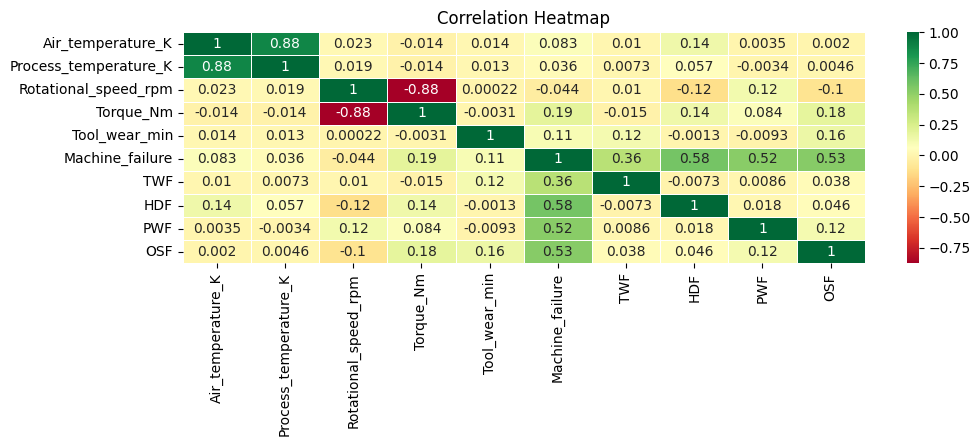

In [33]:
correlation_heatmap_graph = plt.figure(figsize = (11, 3))
sns.heatmap(correlations, linewidths = 0.5, annot = True, cmap = "RdYlGn")
plt.title("Correlation Heatmap", size = 12)

The correlation study reveals two important relationships: 

- There is a high positive correlation between air temperature and process temperature, which means that when air temperature rises, so does process temperature.
- There is a high negative correlation between torque and rotational speed, meaning that as torque rises, rotational speed falls.

The heatmap also confirms that the strongest relationships with machine failure are found in HDF, OSF, and PWF, as previously established.

Next, pairplot visualization are used to spot trend, outliers and relationships between multiple variables in a dataset.

In [34]:
# Drop the different machine failure types from the dataset
columns_to_drop = ["TWF", "HDF", "PWF", "OSF"]
df_dropped = predictive_maintenance.drop(columns_to_drop, axis = 1) 

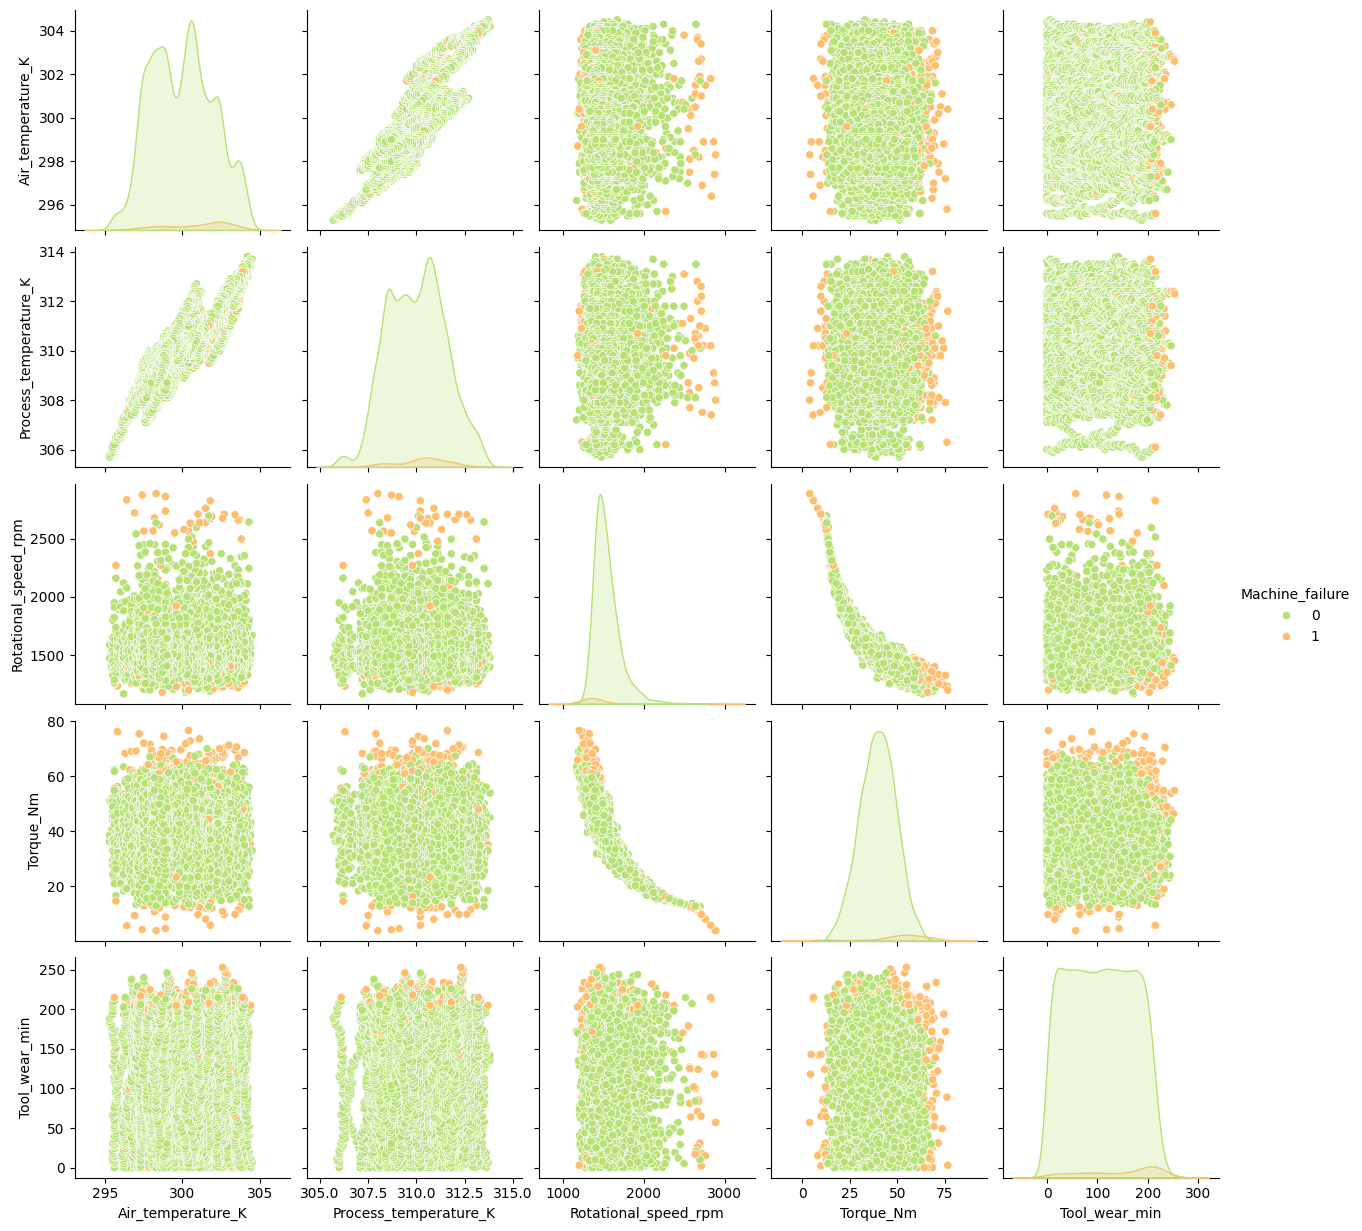

In [35]:
# Create a pairplot to visualize pairwise relationships between features in df_dropped
sns.pairplot(df_dropped, hue = "Machine_failure", palette = "RdYlGn_r")

The pairplot analysis reveals that machine failures happen at extreme values of torque and rotational speed, being either very low or very high. This is clear from the graph, where the orange dots (representing failures) are spread across these zones. It suggests that there is a safe operating range for the machines, and when the values fall outside this range, the risk of failure increases. Therefore, the next step consists of plotting torque versus rotational speed for each type of failure. This will help identify the specific ranges in which each type of failure occurs.

Text(0, 0.5, 'Torque (Nm)')

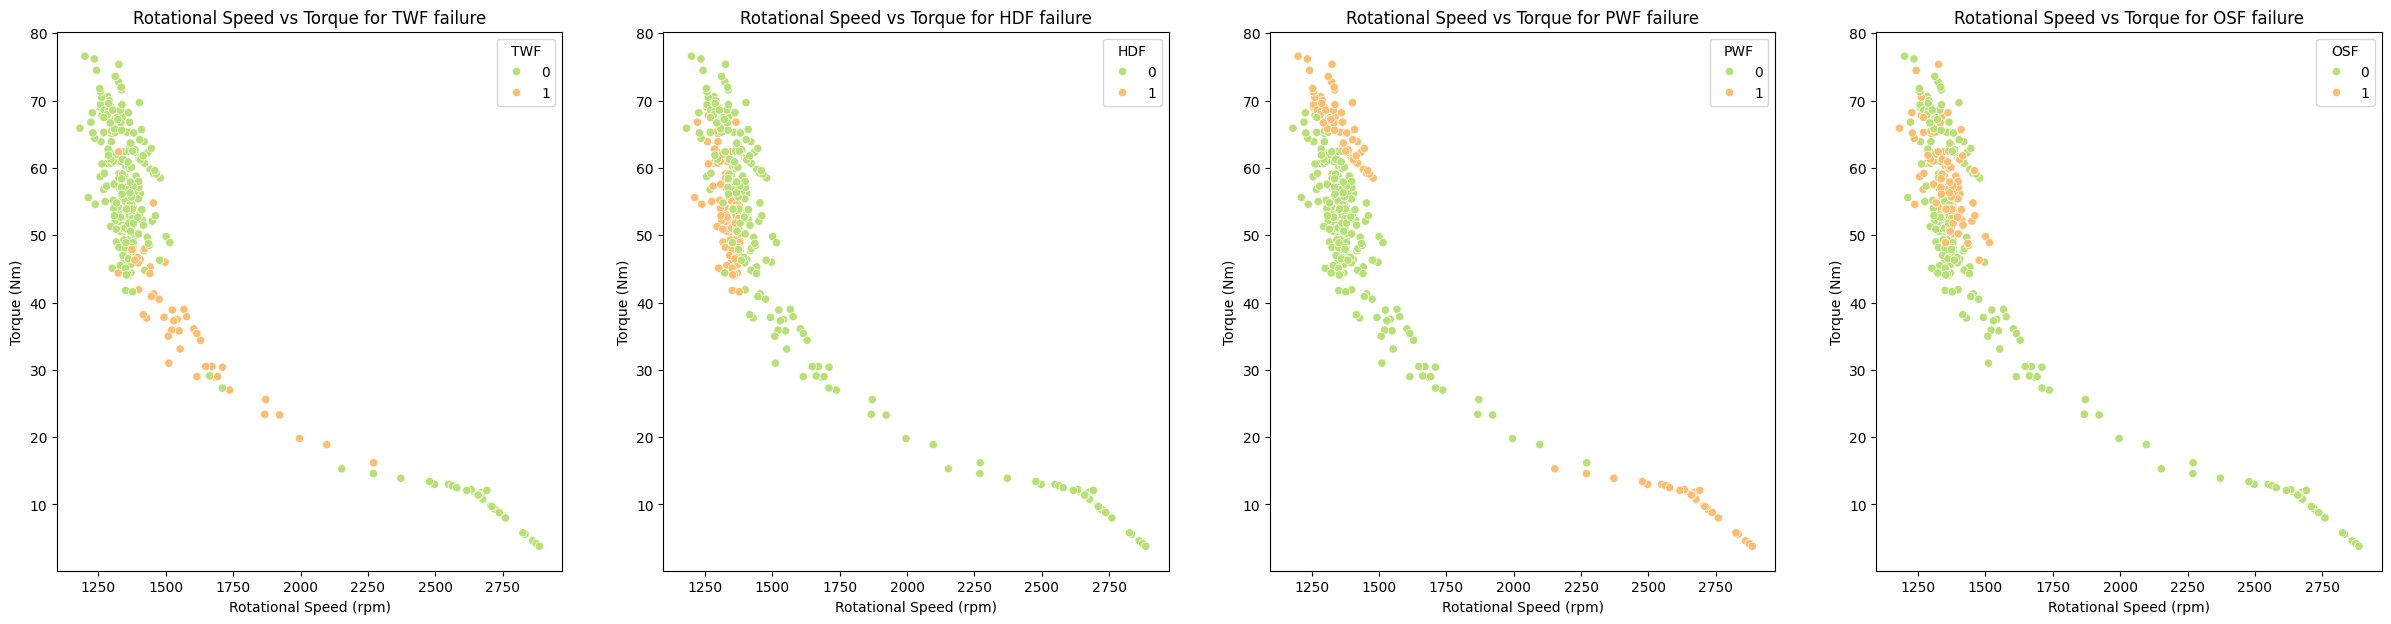

In [36]:
# Plot torque vs rotational speed for each failure type
fig, ax = plt.subplots(1, 4, figsize=(30, 7))

ax = ax.flatten()

sns.scatterplot(data = predictive_maintenance[predictive_maintenance["Machine_failure"] == 1], x = "Rotational_speed_rpm", y = "Torque_Nm", 
                hue = "TWF", ax = ax[0], palette = "RdYlGn_r")
ax[0].set_title("Rotational Speed vs Torque for TWF failure")
ax[0].set_xlabel("Rotational Speed (rpm)")
ax[0].set_ylabel("Torque (Nm)")

sns.scatterplot(data = predictive_maintenance[predictive_maintenance["Machine_failure"] == 1], x = "Rotational_speed_rpm", y = "Torque_Nm", 
                hue = "HDF", ax = ax[1], palette = "RdYlGn_r")
ax[1].set_title("Rotational Speed vs Torque for HDF failure")
ax[1].set_xlabel("Rotational Speed (rpm)")
ax[1].set_ylabel("Torque (Nm)")

sns.scatterplot(data = predictive_maintenance[predictive_maintenance["Machine_failure"] == 1], x = "Rotational_speed_rpm", y = "Torque_Nm", 
                hue = "PWF", ax = ax[2], palette = "RdYlGn_r")
ax[2].set_title("Rotational Speed vs Torque for PWF failure")
ax[2].set_xlabel("Rotational Speed (rpm)")
ax[2].set_ylabel("Torque (Nm)")

sns.scatterplot(data = predictive_maintenance[predictive_maintenance["Machine_failure"] == 1], x = "Rotational_speed_rpm", y = "Torque_Nm", 
                hue = "OSF", ax = ax[3], palette = "RdYlGn_r")
ax[3].set_title("Rotational Speed vs Torque for OSF failure")
ax[3].set_xlabel("Rotational Speed (rpm)")
ax[3].set_ylabel("Torque (Nm)")

**Torque vs Rotational Speed Key Insights:**

* **Tool Wear Failures (TWF):** occur at lower torque and rotational speed ranges.
* **Heat Dissipation Failures (HDF):** arise in high torque and low rotational speed scenarios.
* **Power Failures (PWF):** can happen in either high torque and low rotational speed or low torque and high rotational speed conditions.
* **Overstrain Failures (OSF):** occur under high torque and low rotational speed, similar to heat dissipation failures.

## Pre-processing

The objective of this project is to predict the failure of a milling machine. This goal can be tackled from two different approaches. The first approach treats the problem as a binary classification task, using the feature “Machine_failure” as the target variable. In this case, the model predicts whether the machine will fail or not, regardless of the underlying causes of failure. The second approach is to build a multiclass classification model, which not only predicts whether a failure will occur, but also identifies the specific type of failure. I believe the latter approach is more interesting, so the model developed in this project will be a multiclass classifier.

* **Update the column "Machine_failure" to include all the failure types**

Since the problem will be treated as a multiclass classification, the "Machine_failure" column should be updated to include all types of failures.

In [37]:
predictive_maintenance["Machine_failure"] = 0

# Update the machine failure column based on the types of failure
predictive_maintenance.loc[predictive_maintenance["TWF"] == 1, "Machine_failure"] = 1
predictive_maintenance.loc[predictive_maintenance["HDF"] == 1, "Machine_failure"] = 2
predictive_maintenance.loc[predictive_maintenance["PWF"] == 1, "Machine_failure"] = 3
predictive_maintenance.loc[predictive_maintenance["OSF"] == 1, "Machine_failure"] = 4

# Drop individual failure type columns
predictive_maintenance.drop(columns_to_drop, axis = 1, inplace = True)

In [38]:
predictive_maintenance["Machine_failure"].value_counts()

Machine_failure
0    9670
2     106
4      98
3      83
1      43
Name: count, dtype: int64

* **Encoding categorical data**

Most machine learning models need numerical inputs, so categorical variables must be converted to numbers to help the model understand the data. For features that have a natural order, such as “low,” “medium” and “high,” ordinal coding is a good option. This method assigns an integer to each category based on its order. The use of ordinal coding in decision tree or random forest models allows the algorithm to recognize these relationships, leading to better splits and better performance.

In [39]:
# Import required library
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder(categories=[["L", "M", "H"]])

# Fit and transform the data
predictive_maintenance["Priority_quality_encoded"] = encoder.fit_transform(predictive_maintenance[["Product_quality"]])
predictive_maintenance.drop(["Product_quality"], axis = 1, inplace = True)
predictive_maintenance

Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0                 298.1                  308.6                1551.0   
1                 298.2                  308.7                1408.0   
2                 298.1                  308.5                1498.0   
3                 298.2                  308.6                1433.0   
4                 298.2                  308.7                1408.0   
...                 ...                    ...                   ...   
9995              298.8                  308.4                1604.0   
9996              298.9                  308.4                1632.0   
9997              299.0                  308.6                1645.0   
9998              299.0                  308.7                1408.0   
9999              299.0                  308.7                1500.0   

      Torque_Nm  Tool_wear_min  Machine_failure  Priority_quality_encoded  
0          42.8            0.0                0                       1.0  
1          46.3            3.0                0                       0.0  
2          49.4            5.0                0                       0.0  
3          39.5            7.0                0                       0.0  
4          40.0            9.0                0                       0.0  
...         ...            ...              ...                       ...  
9995       29.5           14.0                0                       1.0  
9996       31.8           17.0                0                       2.0  
9997       33.4           22.0                0                       1.0  
9998       48.5           25.0                0                       2.0  
9999       40.2           30.0                0                       1.0  

[10000 rows x 7 columns]

* **Feature scaling**

Decision Tree or Random Forest models do not need standardization of features. They split data based on feature values, so the scale of the features doesn't affect the model's performance.

## Data splitting and sampling

* **Split data**

The dataset is divided into two main parts: the training set (80%) and the testing set (20%). This is done to avoid overfitting by training on one set and testing in another, and to perform the evaluation of the model. 

**_Training set_**: this is the portion of the dataset used to train the model. During training, the model learns patterns, relationships, and features from the data.

**_Testing set_**: this set is used to evaluate the model's performance after training. It helps assess how well the model generalizes to unseen data.

In [40]:
# Independent features
X = predictive_maintenance.drop("Machine_failure", axis = 1)

# Dependent or target feature
y = predictive_maintenance["Machine_failure"]

# Import required function form the module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training set - X_train shape:", X_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Training set - y_train shape:", y_train.shape)
print("Testing set - y_test shape:", y_test.shape)

Training set - X_train shape: (8000, 6)
Testing set - X_test shape: (2000, 6)
Training set - y_train shape: (8000,)
Testing set - y_test shape: (2000,)


The dataset shows significant imbalances over the course of this project. The following bar chart illustrates the multiclass distribution of machine failures in the training set.

In [41]:
y.value_counts()

Machine_failure
0    9670
2     106
4      98
3      83
1      43
Name: count, dtype: int64

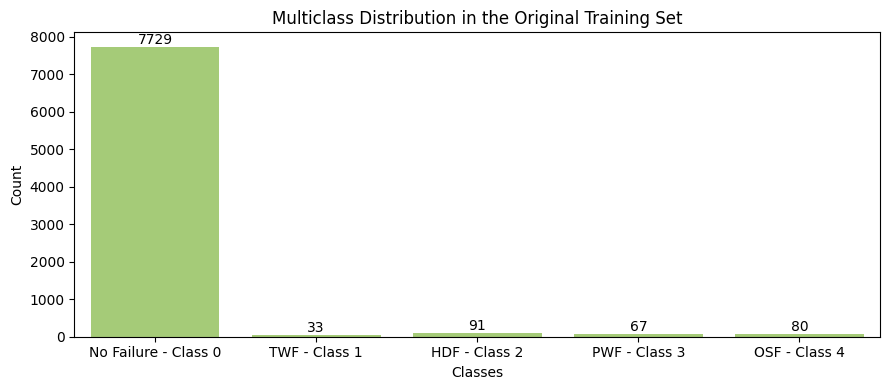

In [42]:
count_class = y_train.value_counts().sort_index()
plt.figure(figsize = (9, 4))
ax = sns.barplot(count_class, color = "#a6d96a")
plt.xticks(ticks = count_class.index, labels = ["No Failure - Class 0", "TWF - Class 1", "HDF - Class 2", "PWF - Class 3", "OSF - Class 4"])
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Count")
plt.xlabel("Classes")
plt.title("Multiclass Distribution in the Original Training Set")
plt.tight_layout()

* **Addressing imbalance**

Class imbalance is a significant challenge in machine learning, as it can distort the model training and the result interpretation. For example: a model that predicts that machines never fail could achieve 97% accuracy even thought it does not predict any failure. To solve this problem, data augmentation is applied to achieve an 80/20 ratio between no failure and failure observations, while ensuring an even distribution of failure causes.

Typical methods for data augmentation are:

1. **Under-sampling**: reducing instances in the majority class.
2. **Over-sampling**: duplicating instances in the minority class.
3. **SMOTE (Synthetic Minority Oversampling Technique)**: creating new synthetic samples.

The first two methods may result in data loss or oversimplification in data sets with limited information. Since class 1 has very few observations in comparison with class 0, SMOTE is used in this project. SMOTE creates new samples by slightly adjusting existing data points towards their neighbors. It works by selecting randomly a minority class sample, identifying its k nearest neighbors, and creating new data points by scaling the distance to these neighbors. This maintains the integrity of the minority class while expanding the data set.

Once the dataset is split into training and test sets, SMOTE is applied **only** to the training set. This preserves the test set as a true representation of the original data distribution and prevents any leakage of information from the training set. This approach helps maintain the integrity of the evaluation process.

In [43]:
# Import the required library
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to create an oversampled dataset
oversample = SMOTE(random_state = 42)
X_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)

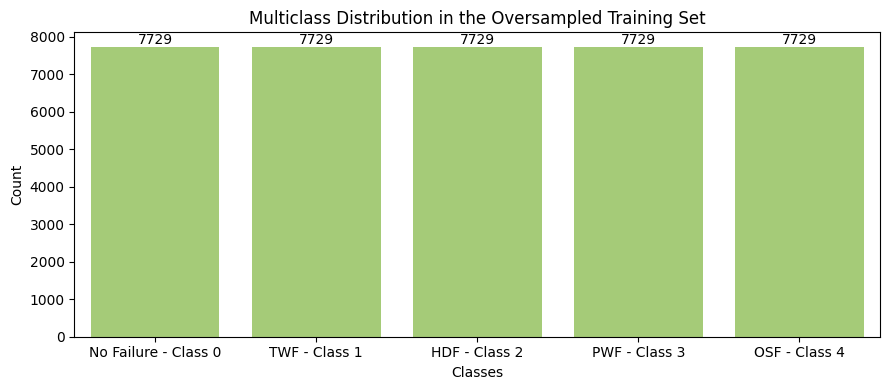

In [44]:
oversampled_count_class = y_oversampled.value_counts().sort_index()
plt.figure(figsize = (9, 4))
ax = sns.barplot(oversampled_count_class, color = "#a6d96a")
plt.xticks(ticks = oversampled_count_class.index, labels = ["No Failure - Class 0", "TWF - Class 1", "HDF - Class 2", "PWF - Class 3", "OSF - Class 4"])
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Count")
plt.xlabel("Classes")
plt.title("Multiclass Distribution in the Oversampled Training Set")
plt.tight_layout()

As seen in the bar chart above, SMOTE has sucessfully oversampled the training set. Now all the classes have the same amount of observations.

## Modeling

This section of the project involves the development of a predictive machine learning model capable of forecasting failures in an industrial milling machine.The chosen algorithms to build the model are **decision tree** and **random forest**, both of which are effective in analyzing complex datasets and identifying patterns that may signal potential failures.

### **Decision Tree Model**

A decision tree model is an intuitive machine learning algorithm that helps you make predictions based on data. Consider it like a flowchart where each question you ask leads you down a different path. As the tree branches, it breaks down the data into smaller parts based on specific characteristics, resulting in a final decision on the leaves. This method makes it easy to see how different factors influence the results, which makes decision trees a popular choice for anyone who wants to understand the reasoning behind the predictions.

#### **Original Decision Tree Model**

The decision tree model is trained on the original training set without applying SMOTE.

The evaluation metrics used throughout this project are the following: 
- **Accuracy:** proportion of cases predicted correctly.
- **F1 score:** the harmonic mean of precision and recall.
- **Precision:** the ratio of true positives to the total predicted positives.
- **Recall:** the ratio of true positives to the total actual positives.
- **Confusion matrix:** a table to display true positives, true negatives, false positives, and false negatives.
- **Classification report:** includes precision, recall, and F1-score for each class.
- **ROC AUC:** the model's ability to distinguish between classes.

In [45]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state = 42)

# Train the classifier
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average = "weighted")
precision_dt = precision_score(y_test, y_pred_dt, average = "weighted")
recall_dt = recall_score(y_test, y_pred_dt, average = "weighted")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Compute ROC AUC for multi-class (using one-vs-rest)
y_score_dt = dt_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_score_dt, multi_class = "ovr")

# Print the results
print(f"""
Original Decision Tree Model
*******************
Evaluation metrics:
-------------------
Accuracy: {accuracy_dt:.2f}
F1 Score: {f1_dt:.2f}
Precision: {precision_dt:.2f}
Recall: {recall_dt:.2f}
ROC AUC Score: {roc_auc_dt:.2f}
-------------------
Confusion Matrix:\n {conf_matrix_dt}
-------------------
Classification Report: \n {class_report_dt}
""")


Original Decision Tree Model
*******************
Evaluation metrics:
-------------------
Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98
ROC AUC Score: 0.80
-------------------
Confusion Matrix:
 [[1917   10    1    7    6]
 [   9    1    0    0    0]
 [   2    0   13    0    0]
 [   2    0    1   13    0]
 [   7    0    1    0   10]]
-------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1941
           1       0.09      0.10      0.10        10
           2       0.81      0.87      0.84        15
           3       0.65      0.81      0.72        16
           4       0.62      0.56      0.59        18

    accuracy                           0.98      2000
   macro avg       0.63      0.66      0.65      2000
weighted avg       0.98      0.98      0.98      2000




**Original Decision Tree Model Evaluation:**

_Performance Summary_
- **Accuracy (0.98)**: high overall accuracy but may mask class imbalance issues.
- **F1 score (0.98)**: indicates a good balance between precision and recall.
- **ROC AUC (0.80)**: suggests decent class discrimination, but there's room for improvement.

_Confusion Matrix Insights_
- **Class 0**: excellent performance.
- **Class 1**: poor performance with only 1 true positive, which indicates a major problem. 
- **Class 2**: good predictions, showing reasonable class identification.
- **Class 3**: moderate performance with some classification error.
- **Class 4**: similar performance to Class 3, moderate with some misclassifications.

_Classification Report_
- **Macro Avg**: low precision and recall (0.63, 0.66) indicate struggles with certain classes, especially class 1.
- **Weighted Avg**: high scores (0.98) reflect better performance overall.

_Key Insights_

Although the model shows high accuracy and F1 scores, the important challenges with certain classes, in particular class 1, require further exploration and adjustments, such as addressing class imbalance using oversampling techniques like SMOTE.

#### **Oversampled Decision Tree**

Given the limited number of samples in class 1 and the model's inability to predict it, the data imbalance will be addressed using SMOTE (Synthetic Minority Over-sampling Technique).

In [46]:
# Create a Decision Tree classifier
dt_smote_model = DecisionTreeClassifier(random_state = 42)

# Train the classifier
dt_smote_model.fit(X_oversampled, y_oversampled)

# Make predictions
y_pred_dt_smote = dt_smote_model.predict(X_test)

# Evaluate the model
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
f1_dt_smote = f1_score(y_test, y_pred_dt_smote, average = "weighted")
precision_dt_smote = precision_score(y_test, y_pred_dt_smote, average = "weighted")
recall_dt_smote = recall_score(y_test, y_pred_dt_smote, average = "weighted")
conf_matrix_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)
class_report_dt_smote = classification_report(y_test, y_pred_dt_smote)

# Compute ROC AUC for multi-class (using one-vs-rest)
y_score_dt_smote = dt_smote_model.predict_proba(X_test)
roc_auc_dt_smote = roc_auc_score(y_test, y_score_dt_smote, multi_class = "ovr")

# Print the results
print(f"""
Oversampled Decision Tree Model
*******************
Evaluation metrics:
-------------------
Accuracy: {accuracy_dt_smote:.2f}
F1 Score: {f1_dt_smote:.2f}
Precision: {precision_dt_smote:.2f}
Recall: {recall_dt_smote:.2f}
ROC AUC Score: {roc_auc_dt_smote:.2f}
-------------------
Confusion Matrix:\n {conf_matrix_dt_smote}
-------------------
Classification Report: \n {class_report_dt_smote}
""")


Oversampled Decision Tree Model
*******************
Evaluation metrics:
-------------------
Accuracy: 0.97
F1 Score: 0.97
Precision: 0.98
Recall: 0.97
ROC AUC Score: 0.82
-------------------
Confusion Matrix:
 [[1903   17    8    9    4]
 [   8    1    0    0    1]
 [   3    0   11    1    0]
 [   3    0    0   13    0]
 [   2    0    0    1   15]]
-------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1941
           1       0.06      0.10      0.07        10
           2       0.58      0.73      0.65        15
           3       0.54      0.81      0.65        16
           4       0.75      0.83      0.79        18

    accuracy                           0.97      2000
   macro avg       0.58      0.69      0.63      2000
weighted avg       0.98      0.97      0.97      2000




**Oversampled Decision Tree Model Evaluation:**

_Performance Summary_
- **Accuracy (0.97)**: excellent overall accuracy.
- **F1 score (0.97)**: indicates a strong balance between precision and recall.
- **ROC AUC (0.82)**: very effective class discrimination.

_Confusion Matrix Insights_
- **Class 0**: excellent performance.
- **Class 1**: poor performance, with only 1 true positive, highlighting persistent challenges in recognizing this class..
- **Class 2**: moderate performance with some misclassifications.
- **Class 3**: fair performance, but the model still struggles in the classification.
- **Class 4**: reasonably good performance with some errors.

_Classification Report Insights_
- **Macro Avg**: low precision and recall (0.58, 0.61) indicate that the model struggles with some classes, especially class 1.
- **Weighted Avg**: high scores reflect strong overall model performance driven mainly by class 0.

_Key Insights_

Despite high accuracy and F1 scores, the model struggles classifying minority classes, especially class 1. This requires further exploration and adjustments like exploring alternative modeling approaches to improve performance across all classes.

#### **Comparison of both Decision Tree Models**

It is now time to compare both decision trees and evaluate their performance to determine which one is more effective.

| **Metric**                     | **Original Decision Tree Model** | **Oversampled Decision Tree Model** |
|--------------------------------|----------------------------------|-------------------------------------|
| **Accuracy**                   | 0.98                             | 0.97                                |
| **F1 Score**                   | 0.98                             | 0.97                                |
| **Precision**                  | 0.98                             | 0.98                                |
| **Recall**                     | 0.98                             | 0.97                                |
| **ROC AUC Score**              | 0.80                             | 0.82                                |

**Key Insights**

- Both models have high accuracy and F1 scores, but the oversampled model has improved class discrimination and overall balance.
- The small decrease in accuracy and F1 score of the oversampled model shows that it focuses on correcting class imbalance rather than simply maximizing overall scores.
- The **ROC AUC score** improved from 0.80 to 0.82, meaning it’s better at distinguishing between classes, but there's still room for improvement.
- The **oversampled model** does a better job of telling different classes apart, especially for the less common ones.
- The two models generally perform well, but the oversampled decision tree is a step closer to a reliable classification, especially when dealing with class imbalance. Additional adjustments are still needed to improve performance across all classes.

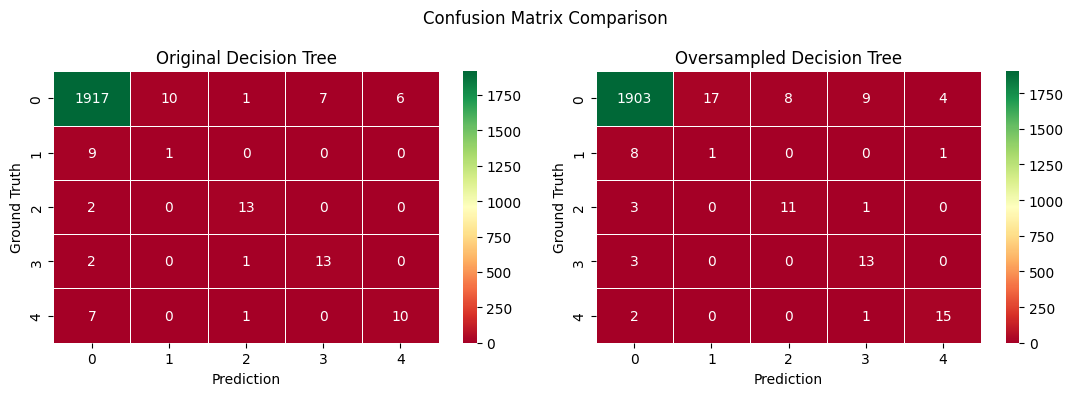

In [47]:
# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize = (11, 4))
sns.heatmap(conf_matrix_dt, ax = ax[0], linewidths = 0.5, annot = True, cmap = "RdYlGn", fmt = "d")
sns.heatmap(conf_matrix_dt_smote, ax = ax[1], linewidths = 0.5, annot = True, cmap = "RdYlGn", fmt = "d")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Ground Truth")
ax[0].set_title("Original Decision Tree")
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Ground Truth")
ax[1].set_title("Oversampled Decision Tree")
plt.suptitle("Confusion Matrix Comparison", size = 12)
plt.tight_layout()

### **Random Forest**

A random forest model is a machine learning algorithm that uses multiple decision trees to make predictions. It works by creating a “forest” of trees, each trained on a different subset of data. When making a prediction, the model combines the results from all the trees to reach a final decision, which helps improve accuracy and reduce the risk of overfitting.

#### **Original Random Forest**

Although the oversampled decision tree shows promise, it still has problems with class discrimination. To solve this problem, the next step will be to explore whether a more advanced algorithm, such as Random Forest, can improve performance. The methodology remains the same: to train two Random Forest models, one using the original training set and one incorporating the oversampling method. By comparing the results, it is expected to identify which model offers better class discrimination and overall efficiency.

In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state = 42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average = "weighted")
precision_rf = precision_score(y_test, y_pred_rf, average = "weighted")
recall_rf = recall_score(y_test, y_pred_rf, average = "weighted")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Compute ROC AUC for multi-class (using one-vs-rest)
y_score_rf = rf_model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_score_rf, multi_class = "ovr")

# Print the results
print(f"""
Original Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: {accuracy_rf:.2f}
F1 Score: {f1_rf:.2f}
Precision: {precision_rf:.2f}
Recall: {recall_rf:.2f}
ROC AUC Score: {roc_auc_rf:.2f}
-------------------
Confusion Matrix:\n {conf_matrix_rf}
-------------------
Classificacion Report: \n {class_report_rf}
""")


Original Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98
ROC AUC Score: 0.98
-------------------
Confusion Matrix:
 [[1937    0    1    3    0]
 [  10    0    0    0    0]
 [   5    0   10    0    0]
 [   4    0    0   12    0]
 [   5    0    0    2   11]]
-------------------
Classificacion Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1941
           1       0.00      0.00      0.00        10
           2       0.91      0.67      0.77        15
           3       0.71      0.75      0.73        16
           4       1.00      0.61      0.76        18

    accuracy                           0.98      2000
   macro avg       0.72      0.61      0.65      2000
weighted avg       0.98      0.98      0.98      2000




c:\Users\Virginia\Python\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Virginia\Python\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Virginia\Python\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Virginia\Pyth

**Original Random Forest Model Evaluation**

_Overall Performance:_
- **Accuracy (0.98)**: high overall accuracy, indicating strong performance.
- **F1 Score (0.98)**: strong balance between precision and recall.
- **ROC AUC Score (0.98)**: suggests excellent class discrimination.

_Confusion Matrix Insights:_
- **Class 0**: excellent performance.
- **Class 1**: significant issues, no predictions were made.
- **Class 2**: strong precision but lower recall indicating that some instances were missed.
- **Class 3**: moderate performance with some misclassifications
- **Class 4**: good predictions, but there is room for improvement.

_Classification Report Insights:_
- **Macro Avg:** moderate precision and recall, indicating struggles discriminating class 1.
- **Weighted Avg:** high scores (0.98) reflect strong overall performance practically driven by class 0.

_Key Insights_

The Random Forest model performs well overall, but it faces a major challenge with class 1, as it hasn't made any correct predictions for that category. While it does a great job identifying class 0, there's a clear need to improve how it recognizes the less represented classes to improve overall accuracy. To achieve this, further adjustments and specific strategies will be essential to ensure that all classes, especially class 1, are classified more effectively.

#### **Oversampled Random Forest Model**

The original random forest model struggles classifying class 1, therefore the oversamplin SMOTE method will applied to the training set to augmentate the dataset.

In [50]:
# Create and train the classifier model
rf_smote = RandomForestClassifier(random_state = 42)
rf_smote.fit(X_oversampled, y_oversampled)

# Make predictions
y_pred_rf_smote = rf_smote.predict(X_test)

# Evaluate the model
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote, average = "weighted")
precision_rf_smote = precision_score(y_test, y_pred_rf_smote, average = "weighted")
recall_rf_smote = recall_score(y_test, y_pred_rf_smote, average = "weighted")
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
class_report_rf_smote = classification_report(y_test, y_pred_rf_smote)

# Compute ROC AUC for multi-class (using one-vs-rest)
y_score_rf_smote = rf_smote.predict_proba(X_test)
roc_auc_rf_smote = roc_auc_score(y_test, y_score_rf_smote, multi_class = "ovr")

# Print the results
print(f"""
Oversampled Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: {accuracy_rf_smote:.2f}
F1 Score: {f1_rf_smote:.2f}
Precision: {precision_rf_smote:.2f}
Recall: {recall_rf_smote:.2f}
ROC AUC Score: {roc_auc_rf_smote:.2f}
-------------------
Confusion Matrix:\n {conf_matrix_rf_smote}
-------------------
Classificacion Report: \n {class_report_rf_smote}
""")


Oversampled Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: 0.97
F1 Score: 0.98
Precision: 0.98
Recall: 0.97
ROC AUC Score: 0.97
-------------------
Confusion Matrix:
 [[1904   18    6   10    3]
 [   7    3    0    0    0]
 [   5    0   10    0    0]
 [   4    0    0   12    0]
 [   2    0    0    0   16]]
-------------------
Classificacion Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1941
           1       0.14      0.30      0.19        10
           2       0.62      0.67      0.65        15
           3       0.55      0.75      0.63        16
           4       0.84      0.89      0.86        18

    accuracy                           0.97      2000
   macro avg       0.63      0.72      0.66      2000
weighted avg       0.98      0.97      0.98      2000




**Oversampled Random Forest Model Evaluation**

_Overall Performance:_
- **Accuracy (0.97):** high overall accuracy, indicating strong model performance.
- **F1 Score (0.98):** indicates a good balance between precision and recall.
- **ROC AUC (0.97):** suggests strong class discrimination.

_Confusion Matrix Insights:_
- **Class 0:** perfect performance with very few misclassifications.
- **Class 1:** significant issues remain, with low precision and recall (14% precision, 30% recall).
- **Class 2:** moderate performance with reasonable precision but lower recall, indicating that some instances are missed.
- **Class 3:** good predictions overall, although there is still room for improvement.
- **Class 4:** good performance with minor misclassifications.

_Classification Report Insights:_
- **Macro Avg:** moderate precision and recall (0.63, 0.72), indicating struggles with class discrimination.
- **Weighted Avg:** high scores (0.99) reflect robust overall performance, primarily driven by class 0.

_Key Insights_

The Oversampled Random Forest model is still doing well, especially with class 0, but it struggles with class 1, showing only slight improvement. While the overall accuracy and F1 score are good, there's definitely room for improvement when it comes to recognizing the underrepresented classes. It will be important to refine strategies for better handling class 1 and possibly other minority classes to improve overall classification results.

#### **Comparison of Both Random Forest Models**

| **Metric**                     | **Original Random Forest Model** | **Oversampled Random Forest Model** |
|--------------------------------|----------------------------------|-------------------------------------|
| **Accuracy**                   | 0.98                             | 0.97                                |
| **F1 Score**                   | 0.98                             | 0.98                                |
| **Precision**                  | 0.98                             | 0.98                                |
| **Recall**                     | 0.98                             | 0.97                                |
| **ROC AUC Score**              | 0.98                             | 0.97                                |

**Key Insights**

- Both models have high accuracy and F1 scores, indicating strong performance overall.
- While the original model has slightly higher accuracy, the oversampled model maintains strong metrics, especially in precision and recall for more frequent classes.
- The classification performance in the **oversampled model** reflects better fits for class imbalance, though class 1 still needs improvement. 
- The **oversampled model** shows improvement in the treatment of minority classes, but still has difficulties classifying class 1.

Since the goal is to classify all classes effectively, the **Oversampled Random Forest Model** is the best choice for these reasons:

- **Better representation for minority classes**: this model is designed to help improve classification of less common classes that the original model struggles with.

- **Better recovery for underrepresented classes**: although the performance of class 1 is still low, oversampling provides a better chance of correctly identifying and classifying these classes.

- **More balanced results**: the oversampled model provides a fairer understanding of how well each class is classified, which is important when all classes are important.

- **Focus on all classes**: By ensuring that all classes are represented in the training data, this model better aligns with the goal of classifying everything, not just maximizing overall accuracy.

**Conclusion**

Although the original model has higher overall accuracy, the oversampledd model is better at ensuring that all classes are effectively classified. It may need some adjustments for specific classes, especially class 1, but overall, it is a better choice for global classification.

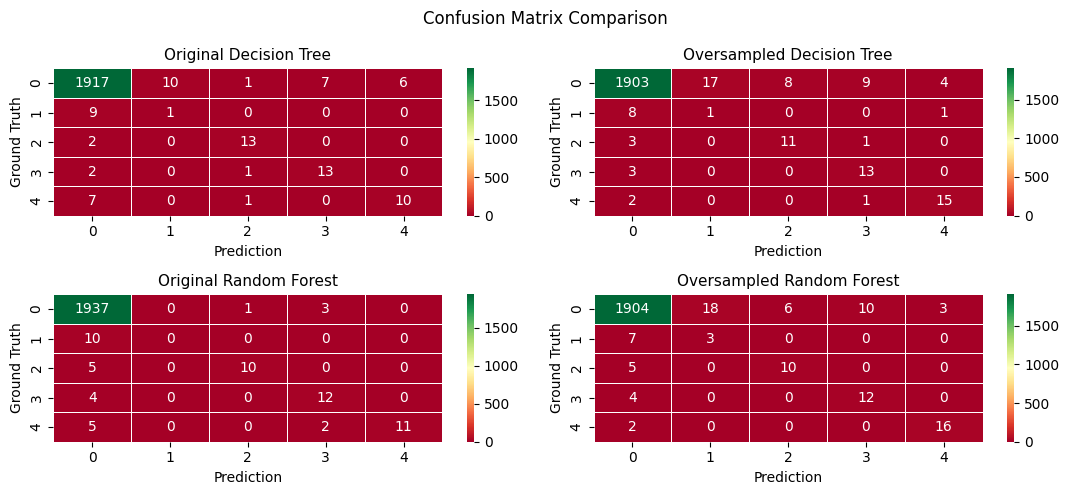

In [51]:
# Plot Confusion Matrices
fig, ax = plt.subplots(2, 2, figsize = (11, 5))
sns.heatmap(conf_matrix_dt, ax=ax[0, 0], linewidths=0.5, annot=True, cmap="RdYlGn", fmt="d")
ax[0, 0].set_title("Original Decision Tree", size = 11)

sns.heatmap(conf_matrix_dt_smote, ax=ax[0, 1], linewidths=0.5, annot=True, cmap="RdYlGn", fmt="d")
ax[0, 1].set_title("Oversampled Decision Tree", size = 11)

sns.heatmap(conf_matrix_rf, ax=ax[1, 0], linewidths=0.5, annot=True, cmap="RdYlGn", fmt="d")
ax[1, 0].set_title("Original Random Forest", size = 11)

sns.heatmap(conf_matrix_rf_smote, ax=ax[1, 1], linewidths=0.5, annot=True, cmap="RdYlGn", fmt="d")
ax[1, 1].set_title("Oversampled Random Forest", size = 11)

for i in range(2):
    for j in range(2):
        index = i * 2 + j
        ax[i, j].set_xlabel("Prediction")
        ax[i, j].set_ylabel("Ground Truth")
plt.suptitle("Confusion Matrix Comparison", size = 12)
plt.tight_layout()

### **Hyperparameter Tuning: Find the Best Oversampled Random Forest**

To identify the best hyperparameters for the oversampled Random Forest model, the GridSearchCV module from scikit-learn will be used. This method systematically tests various combinations of hyperparameters to determine the optimal settings that enhance model performance. By employing cross-validation, GridSearchCV ensures that the selected hyperparameters contribute to improved effectiveness in making predictions.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the model
random_forest = RandomForestClassifier(random_state = 42, class_weight = "balanced")

# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [50, 75, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, scoring = "f1_weighted", cv = 3, n_jobs = -1, verbose = 2)

# Fit GridSearchCV
grid_search.fit(X_oversampled, y_oversampled)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


The best hyperparameters are:

- `n_stimators`: 50
- `max_depth`: None
- `min_samples_split`: 2
- `criterion`: gini
- `bootstrap`: False

The Random Forest model will now be trained using the best hyperparameters identified earlier. However, it was found in various trials that the model performs better when the **min_samples_split** is set to 3 instead of 2. So, the model will be built and trained with this adjustment to help improve its performance.

In [ ]:
# Define and fit the model
best_rf_model = RandomForestClassifier(random_state = 42, class_weight = "balanced", n_estimators = 50, max_depth = None, min_samples_split = 3, bootstrap = False)
best_rf_model.fit(X_oversampled, y_oversampled)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average = "weighted")
precision_best_rf = precision_score(y_test, y_pred_best_rf, average = "weighted")
recall_best_rf = recall_score(y_test, y_pred_best_rf, average = "weighted")
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Compute ROC AUC for multi-class (using one-vs-rest)
y_score_best_rf = best_rf_model.predict_proba(X_test)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class = "ovr")

# Print the results
print(f"""
Hyperparameter Tuning: Best Oversampled Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: {accuracy_best_rf:.2f}
F1 Score: {f1_best_rf:.2f}
Precision: {precision_best_rf:.2f}
Recall: {recall_best_rf:.2f}
ROC AUC Score: {roc_auc_best_rf:.2f}
-------------------
Confusion Matrix:\n {conf_matrix_best_rf}
-------------------
Classification Report: \n {class_report_best_rf}
""")


Hyperparameter Tuning: Best Oversampled Random Forest Model
*******************
Evaluation metrics:
-------------------
Accuracy: 0.97
F1 Score: 0.98
Precision: 0.98
Recall: 0.97
ROC AUC Score: 0.99
-------------------
Confusion Matrix:
 [[1909   14    5    9    4]
 [   7    3    0    0    0]
 [   4    0   11    0    0]
 [   4    0    0   12    0]
 [   3    0    0    0   15]]
-------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1941
           1       0.18      0.30      0.22        10
           2       0.69      0.73      0.71        15
           3       0.57      0.75      0.65        16
           4       0.79      0.83      0.81        18

    accuracy                           0.97      2000
   macro avg       0.64      0.72      0.68      2000
weighted avg       0.98      0.97      0.98      2000




**Best Oversampled Random Forest Model Evaluation:**

_Performance Summary_
- **Accuracy (0.97):** excellent overall accuracy.
- **F1 Score (0.98):** indicates a strong balance between precision and recall.
- **Precision (0.98):** shows the model's effectiveness in correctly identifying positive instances.
- **Recall (0.97):** reflects the model's ability to capture most of the actual positives.
- **ROC AUC Score (0.99):** suggests very effective class discrimination.

_Confusion Matrix Insights_
- **Class 0:** excellent performance with minimal misclassifications.
- **Class 1:** poor performance, with only 3 true positives, highlighting ongoing difficulties in recognizing this class.
- **Class 2:** moderate performance, showing reasonable precision but missing some instances.
- **Class 3:** fair performance, with some room for improvement in classification accuracy.
- **Class 4:** good performance overall, with a few minor errors.

_Classification Report Insights_
- **Macro Avg:** moderate precision and recall (0.64, 0.72) indicate challenges with some classes, particularly class 1.
- **Weighted Avg:** high scores (0.98) reflect strong overall performance, mainly driven by class 0.

**Key Insights and Conclusion**

The **Best Oversampled Random Forest Model** has a high accuracy and F1 scores, but it still struggles to properly classify class 1. Even after hyperparameter tuning, the model need some adjustments to improve performance across all clases. Nonetheless, this model is generally better due to the following reasons:

- **ROC AUC score**: the tuned model has a higher ROC AUC score (0.99) compared to the other models. This means it’s better at distinguishing between classes, which is crucial for effective predictions.

- **Class-specific improvements**: the tuned model shows enhancements in precision, recall, and F1 score for class 1 and 2, which are minority classes. This suggests that the tuning helped the model recognize these less common classes more effectively.

- **Overall metrics**: while the accuracy, F1 score, and precision are the same for both models, the tuned version has slight improvements in other areas, indicating it’s more capable overall.

In conclusion, both models are strong, but the tuned model does a better job, especially when it comes to recognizing important but less frequent classes. It’s a solid choice for real world applications where understanding all classes is key.

Text(108.22222222222221, 0.5, 'True Label')

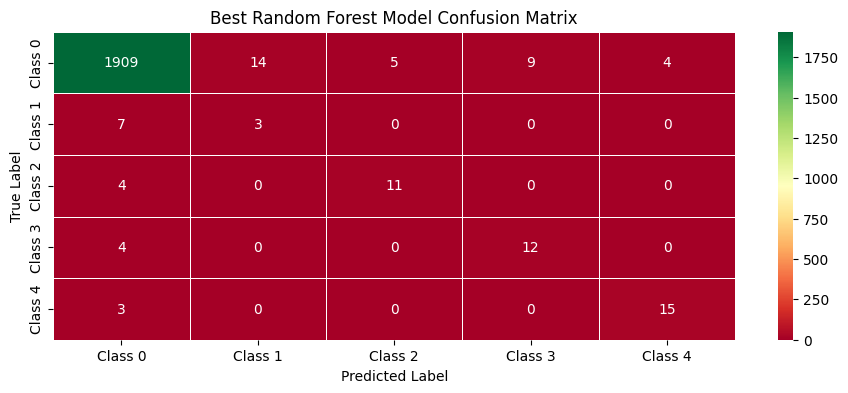

In [ ]:
plt.figure(figsize = (11, 4))
sns.heatmap(conf_matrix_best_rf, annot = True, fmt = "d", cmap = "RdYlGn", linewidths = 0.5, 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.title("Best Random Forest Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

**Feature Importance**

In machine learning, determining the importance of features is crucial for several reasons.  First, it makes it easier to understand the model by helping us identify features that influence predictions.  In addition, it allows us to simplify our data by removing unnecessary features, potentially improving the accuracy and performance of the model while decreasing the possibility of overfitting. Overall, knowing the importance of features improves the efficiency and usefulness of our models.

It is clear from the graph that the features that most affect the model predictions are **torque, tool wear and rotational speed**. Process temperature and product quality are of little importance. 

Text(0.5, 1.0, 'Feature Importance')

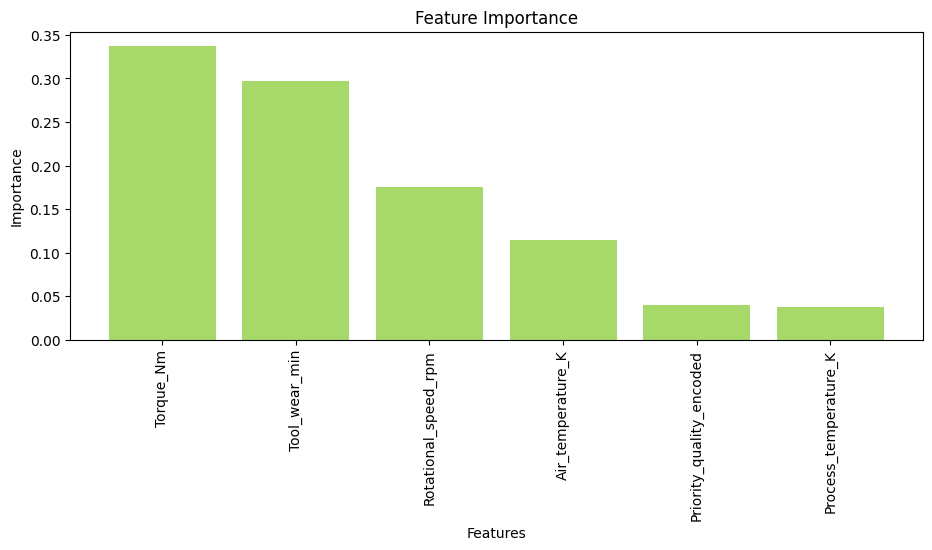

In [ ]:
# Calculate feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
feature_importance_graph = plt.figure(figsize = (11, 4))
plt.bar(range(X_oversampled.shape[1]), importances[indices], align = "center", color = "#a6d96a")
plt.xticks(range(X_oversampled.shape[1]), X_oversampled.columns[indices], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")

**ROC AUC Curve**

The Receiver Operating Characteristic curve (ROC) is a useful tool for evaluating the performance of a classification model. It displays the rate of true positives versus the rate of false positives at different threshold levels. This curve helps us to see how well the model distinguishes between positive and negative classes. The area under the ROC curve (AUC) gives us a single measure of performance: an AUC of 1 means perfect classification, while an AUC of 0.5 indicates no ability to discriminate between classes. 

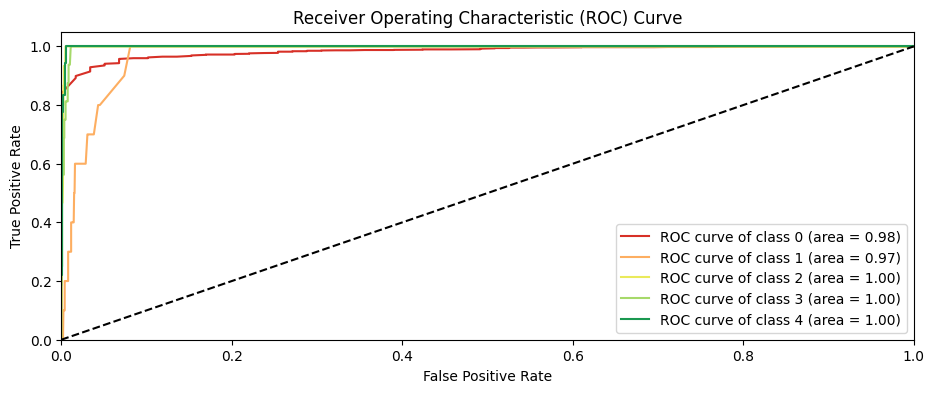

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_bin = label_binarize(y_test, classes = [0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], best_rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ["#d73027", "#fdae61", "#eaea5b", "#a6d96a", "#1a9850"]

# Plot ROC curves
plt.figure(figsize = (11, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color =colors[i], label = "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")

**Precision-Recall Curve**

The accuracy- recall curve is a very useful tool to evaluate a classification model. It shows the balance between precision and recall at various threshold levels. 

- Precision reflects the accuracy of positive predictions (true positives divided by total predicted positives).

- Recall measures how well the model identifies true positive cases (true positives divided by total true positives).

The curve represents precision on the y-axis and recall on the x-axis, making it especially useful in situations with unbalanced classes. 

It is clear from the graph that the recall-precision of class 1 is the lowest. In contrast, class 0 shows a perfect balance between both metrics, while the other classes show a similar pattern.

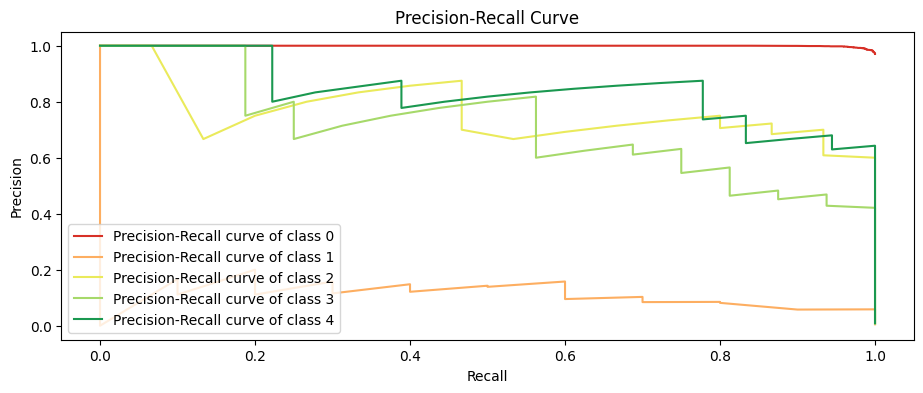

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize = (11, 4))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], best_rf_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, color = colors[i], label = "Precision-Recall curve of class {0}".format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower left")

## Conclusion

The goal of this project was to develop a predictive model using decision tree and random forest algorithms to predict the failure of an industrial milling machine.

One major challenge faced was the highly unbalanced dataset, which made modeling with these algorithms complicated. To solve this problem, the SMOTE method was employed to oversample the minority classes.

Four models were developed: a decision tree without oversampling, a decision tree with oversampling, a random forest without oversampling, and a random forest with oversampling. The random forest model with oversampled data demonstrated the best performance in distinguishing between classes. However, the accuracy for class 1 remained low. To improve performance, the hyperparameters of the random forest model were tuned, which improved discrimination between classes, as shown by the higher F1, precision, and recall scores for class 1. Despite these improvements, further tuning of the random forest model is needed. Despite these improvements, further improvements are still possible.

**Future work**

As previously mentioned, although the current model performs well, it can be further optimized. Future efforts should focus on exploring more advanced algorithms, such as XGBoost, that can provide better class discrimination. In addition, expanding the dataset to include more minority class observations will be essential to improve classification accuracy.